In [3]:
import os
from collections import defaultdict
import numpy as np

log_dir = './logs'
experiment_logs = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list)))))

for filename in os.listdir(log_dir):
    if filename.endswith('.log'):
        parts = filename.split('-')
        method = '-'.join(parts[0:1])
        experiment_name = '-'.join(parts[1:2])
        dataset = '-'.join(parts[2:3])
        if method == "Auncel":
            k = int('-'.join(parts[3:4]))
            error = float(parts[4:5][0][:-4])
            if dataset == "bert":
                nlist = 128
            else:
                nlist = 1024
        else:
            nlist = '-'.join(parts[3:4])
            k = int('-'.join(parts[4:5]))
            if method == "ConANN":
                error = float(parts[5:6][0])
            else:
                error = float(parts[5:6][0][:-4])

        with open(os.path.join(log_dir, filename), 'r') as file:
            experiment_logs[experiment_name][method][dataset][k][error] = [float(line.strip()) for line in file.readlines()]


datasets = [j for j in experiment_logs['latency']['ConANN'].keys()]
print(datasets)
print(experiment_logs['latency']['ConANN']['deep10M'][100][0.2][:10])

data = experiment_logs['latency']['ConANN']['sift1M'][1000][0.2][:10]
average = np.mean(data)
print(average)

data = experiment_logs['latency']['ConANN']['sift1M'][1000][0.2]
average = np.mean(data)
print(average)

['deep10M', 'bert', 'fasttext', 'sift1M', 'gist']
[7.9751, 11.512, 11.6909, 6.15788, 6.74915, 8.58617, 7.76887, 9.84001, 11.122, 7.45702]
1.702
1.61531954


In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10}) 

experiment_name = 'latency'
k_values = [10, 100, 1000]
error_values = [0.1]
target_datasets = ['deep10M']
methods = ['ConANN', 'Faiss']

for k_idx, k_value in enumerate(k_values):
    print("\nK=", k_value)
    for idx, error_value in enumerate(error_values):
        ax = axes[idx]
        clusters_avg_per_method = {dataset: [] for dataset in target_datasets}
    
        for target_dataset in target_datasets:
            data = {}
            faiss_effs = []
            method = "Faiss"
            for dataset in experiment_logs[experiment_name][method]:
                    if dataset == target_dataset:
                        try:
                            values = experiment_logs[experiment_name][method][dataset][k_value][error_value]
                            eff = experiment_logs['efficiency'][method][dataset][k_value][error_value]
                            faiss_effs = eff[0]
                            data[method] = np.sort(values)
                        except KeyError:
                            continue
            
            method = "ConANN"
            for dataset in experiment_logs[experiment_name][method]:
                    if dataset == target_dataset:
                        try:
                            latencies = experiment_logs[experiment_name][method][dataset][k_value][error_value]
                            efficiencies = experiment_logs['efficiency'][method][dataset][k_value][error_value]
                            faiss_eff = data["Faiss"]
                            filtered = []
                            for i in range(len(efficiencies)):
                                fs = faiss_effs
                                es = efficiencies[i]
                                if fs == es:
                                    filtered.append(latencies[i])
                            data[method] = np.sort(filtered)
                        except KeyError:
                            continue
    
            for method in methods:
                if method in data:
                    avg_clusters = np.mean(data[method])
                    clusters_avg_per_method[target_dataset].append(avg_clusters)
                    
            for i, method in enumerate(methods):
             print(error_value, method, [float(clusters_avg_per_method[dataset][i]) for dataset in target_datasets])



K= 10
0.1 ConANN [4.146485515818432]
0.1 Faiss [3.7784310059999995]

K= 100
0.1 ConANN [5.972303589743589]
0.1 Faiss [5.5500437279999995]

K= 1000
0.1 ConANN [9.914264372019078]
0.1 Faiss [8.369463376]


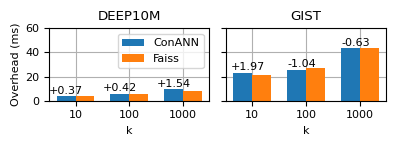

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8}) 

# DEEP10M
# K= 10
# 0.1 ConANN [4.146485515818432]
# 0.1 Faiss [3.7784310059999995]

# K= 100
# 0.1 ConANN [5.972303589743589]
# 0.1 Faiss [5.5500437279999995]

# K= 1000
# 0.1 ConANN [9.914264372019078]
# 0.1 Faiss [8.369463376]


# GIST
# K= 10
# 0.1 ConANN [23.228952012987012]
# 0.1 Faiss [21.258543579999998]

# K= 100
# 0.1 ConANN [25.692999999999998]
# 0.1 Faiss [26.72746378]

# K= 1000
# 0.1 ConANN [43.447416363636364]
# 0.1 Faiss [44.084520600000005]

k_values = [10, 100, 1000]

deep10m_conann = [4.15, 5.97, 9.91]
deep10m_faiss = [3.78, 5.55, 8.37]

gist_conann = [23.23, 25.69, 43.45]
gist_faiss = [21.26, 26.73, 44.08]

bar_width = 0.35
x = np.arange(len(k_values))

fig, axs = plt.subplots(1, 2, figsize=(4, 1.5), sharey=True)

axs[0].bar(x - bar_width/2, deep10m_conann, bar_width, label='ConANN')
axs[0].bar(x + bar_width/2, deep10m_faiss, bar_width, label='Faiss')
axs[0].set_title('DEEP10M')
axs[0].set_xticks(x)
axs[0].set_xticklabels(k_values)
axs[0].set_xlabel('k')
axs[0].set_ylabel('Overhead (ms)')
axs[0].legend()

axs[1].bar(x - bar_width/2, gist_conann, bar_width, label='ConANN')
axs[1].bar(x + bar_width/2, gist_faiss, bar_width, label='Faiss')
axs[1].set_title('GIST')
axs[1].set_xticks(x)
axs[1].set_xticklabels(k_values)
axs[1].set_xlabel('k')

for i, (c, f) in enumerate(zip(deep10m_conann, deep10m_faiss)):
    diff = round(c - f, 2)
    if diff > 0:
        axs[0].text(x[i] - bar_width/2, c + 0.1, f'+{diff}', ha='center', va='bottom')
    else:
        axs[0].text(x[i] - bar_width/2, c + 0.1, f'{diff}', ha='center', va='bottom')

for i, (c, f) in enumerate(zip(gist_conann, gist_faiss)):
    diff = round(c - f, 2)
    if diff > 0:
        axs[1].text(x[i] - bar_width/2 + 0.1, c + 0.6, f'+{diff}', ha='center', va='bottom')
    else:
        axs[1].text(x[i] - bar_width/2 + 0.1, c + 0.6, f'{diff}', ha='center', va='bottom')
        
axs[0].grid(True)
axs[1].grid(True)
axs[0].set_axisbelow(True)
axs[1].set_axisbelow(True)
axs[0].set_ylim(0, 60)
axs[1].set_ylim(0, 60)


plt.tight_layout()
plt.savefig(f'latency_overhead.pdf', format='pdf')
plt.show()